In [1]:
!mkdir data
!wget https://www.dropbox.com/s/n046eblbxjblm6e/peaks.csv?dl=0 -O data/peaks.csv

--2023-04-17 21:36:26--  https://www.dropbox.com/s/n046eblbxjblm6e/peaks.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/n046eblbxjblm6e/peaks.csv [following]
--2023-04-17 21:36:27--  https://www.dropbox.com/s/raw/n046eblbxjblm6e/peaks.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf606a24e35cf61fbff431b0c8b.dl.dropboxusercontent.com/cd/0/inline/B6UgNQoTUaYjzZsvl6qb_sr-avtXUc2VvScSdn-z-VC94RKeiUwGNd8FB_sm6uivgJXSziofC6GIP5u8dwFt7SnMAbw089moJ1bpNIeem1uLYUQksDr09EAwNX0kWnjVkVlodUSarWLRV8ZGdsvLXN4U0crixB4yasDNBwbnABZEBw/file# [following]
--2023-04-17 21:36:28--  https://ucf606a24e35cf61fbff431b0c8b.dl.dropboxusercontent.com/cd/0/inline/B6UgNQoTUaYjzZsvl6qb_sr-avtXUc2VvScSdn-z-VC94RKeiUwGNd8FB_sm6uivgJXSziofC6GIP5u8dwFt

# Visualizing spatial data: examples

Some simple examples of using maplotlib to plot vector and scalar fields.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(context='talk', style="white", rc={'figure.figsize':[6,6]})

## Visualizing a scalar field

To visualize scalar field is possible to use [contour()/countourf()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html#matplotlib.pyplot.contour) functions:

In [ ]:
data =pd.read_csv('data/peaks.csv')
data.head()

,x,y,z
0,-3.0,-3.0,0.000067
1,-2.8,-3.0,0.000182
2,-2.6,-3.0,0.000450
3,-2.4,-3.0,0.000999
4,-2.2,-3.0,0.001968


In [ ]:
Z = data.pivot(index='x',columns='y',values='z')
Z.head()

y,-3.0,-2.8,-2.6,-2.4,-2.2,-2.0,-1.8,-1.6,-1.4,-1.2,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
x,,,,,,,,,,,,,,,,,,,,,
-3.0,0.000067,0.000133,0.000243,0.000403,0.000595,0.000747,0.000695,0.000142,-0.001336,-0.004202,...,-0.008391,-0.004496,-0.001983,-0.000599,0.000015,0.000197,0.000188,0.000125,0.000068,0.000032
-2.8,0.000182,0.000363,0.000663,0.001108,0.001667,0.002185,0.002270,0.001188,-0.002151,-0.008981,...,-0.020590,-0.010665,-0.004308,-0.000889,0.000528,0.000836,0.000681,0.000429,0.000228,0.000106
-2.6,0.000450,0.000892,0.001628,0.002736,0.004188,0.005693,0.006434,0.004772,-0.001855,-0.016481,...,-0.045759,-0.022556,-0.007828,-0.000156,0.002707,0.002958,0.002205,0.001338,0.000697,0.000320
-2.4,0.000999,0.001961,0.003566,0.006014,0.009355,0.013172,0.015997,0.014564,0.003408,-0.024331,...,-0.091307,-0.041626,-0.010466,0.005056,0.009921,0.009149,0.006435,0.003798,0.001951,0.000887
-2.2,0.001968,0.003807,0.006860,0.011583,0.018323,0.026786,0.034863,0.036872,0.022270,-0.023184,...,-0.161410,-0.064152,-0.004126,0.023906,0.030143,0.025223,0.017050,0.009864,0.005008,0.002262


In [ ]:
Z.columns

Float64Index([-3.0, -2.8, -2.6, -2.4, -2.2, -2.0, -1.8, -1.6, -1.4, -1.2, -1.0,
              -0.8, -0.6, -0.4, -0.2,  0.0,  0.2,  0.4,  0.6,  0.8,  1.0,  1.2,
               1.4,  1.6,  1.8,  2.0,  2.2,  2.4,  2.6,  2.8,  3.0],
             dtype='float64', name='y')

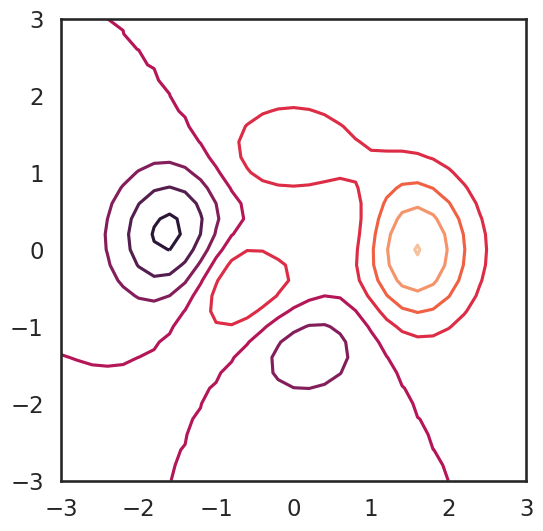

In [ ]:
plt.contour(Z.index,Z.columns,Z)

<a list of 9 text.Text objects>

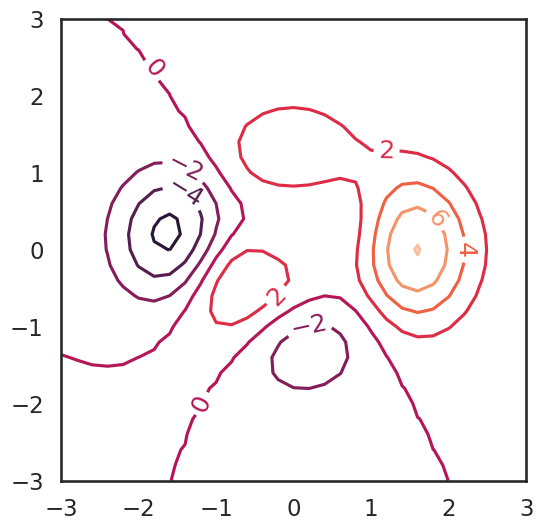

In [ ]:
fig = plt.contour(Z.index,Z.columns,Z)
plt.clabel(fig)

<a list of 5 text.Text objects>

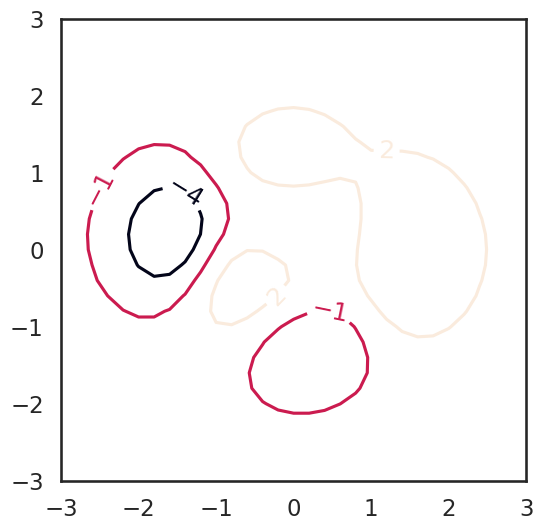

In [ ]:
fig = plt.contour(Z.index,Z.columns,Z,levels=np.arange(-4,5,3))
plt.clabel(fig)

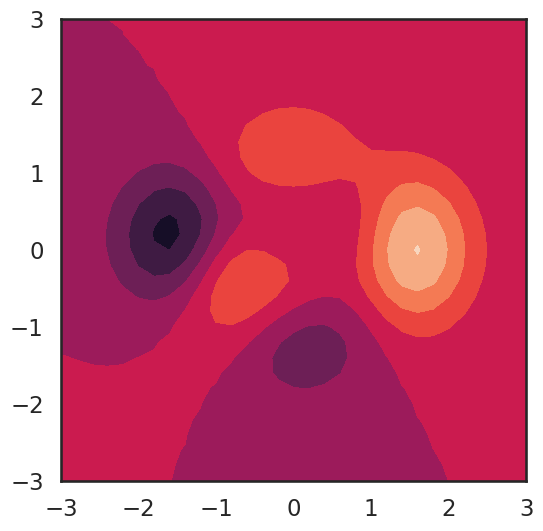

In [ ]:
plt.contourf(Z.index,Z.columns,Z)

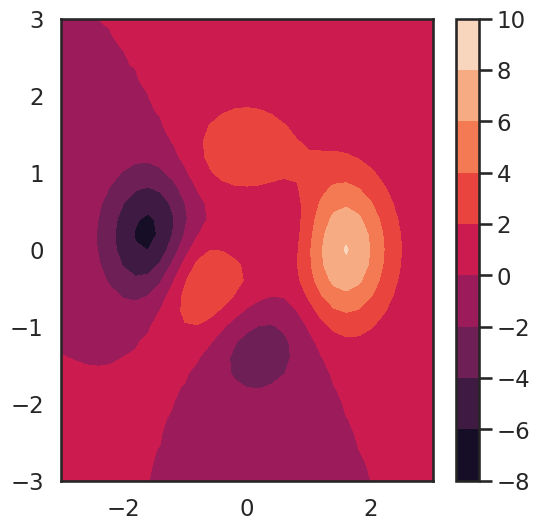

In [ ]:
plt.contourf(Z.index,Z.columns,Z)
plt.colorbar()

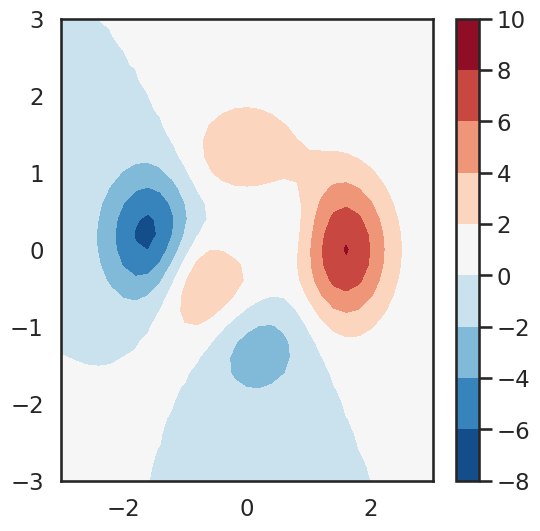

In [ ]:
plt.contourf(Z.index,Z.columns,Z,cmap='RdBu_r')
plt.colorbar()

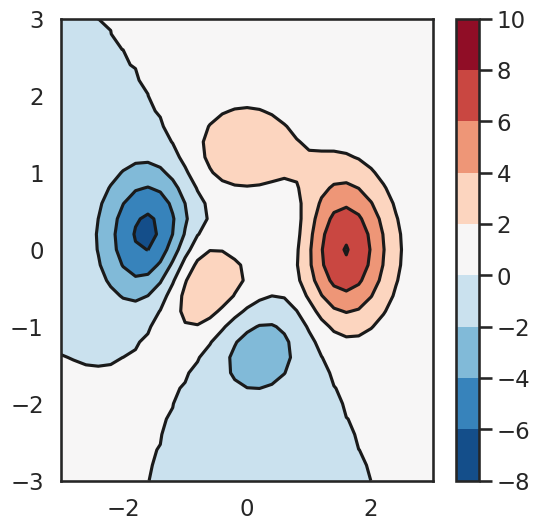

In [ ]:
plt.rcParams['contour.negative_linestyle'] = 'solid' #this is actually the default
plt.contourf(Z.index,Z.columns,Z,cmap='RdBu_r')
plt.colorbar()
plt.contour(Z.index,Z.columns,Z,colors='k') 

## Visualizing a vectorial field

In [ ]:
xx =  np.linspace(0, np.pi, 100)
yy = np.linspace(1, 4, 100)
X, Y = np.meshgrid(xx, yy)
U = np.cos(X)*Y
V = np.sin(Y)*Y
X

array([[0.        , 0.03173326, 0.06346652, ..., 3.07812614, 3.10985939,
        3.14159265],
       [0.        , 0.03173326, 0.06346652, ..., 3.07812614, 3.10985939,
        3.14159265],
       [0.        , 0.03173326, 0.06346652, ..., 3.07812614, 3.10985939,
        3.14159265],
       ...,
       [0.        , 0.03173326, 0.06346652, ..., 3.07812614, 3.10985939,
        3.14159265],
       [0.        , 0.03173326, 0.06346652, ..., 3.07812614, 3.10985939,
        3.14159265],
       [0.        , 0.03173326, 0.06346652, ..., 3.07812614, 3.10985939,
        3.14159265]])

We can use the [quiver()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html?highlight=quiver#matplotlib.pyplot.quiver) function, playing with density:

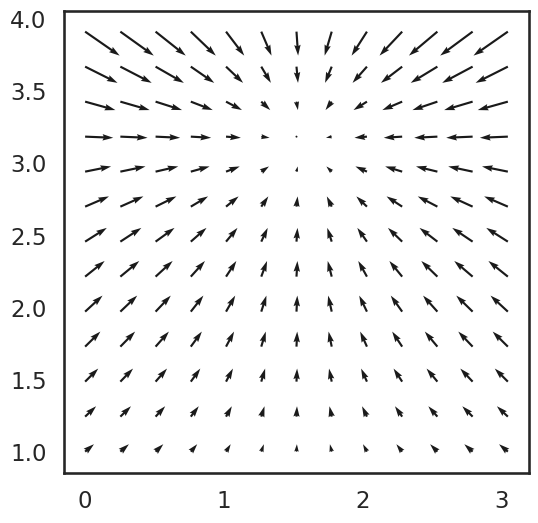

In [ ]:
freq = 8 #try to play with density
headwidth = 3 #default is 3
headlength = 5 #default is 5
plt.quiver(X[::freq,::freq], Y[::freq,::freq], 
           U[::freq,::freq], V[::freq,::freq],
           headwidth=headwidth, headlength=headlength)

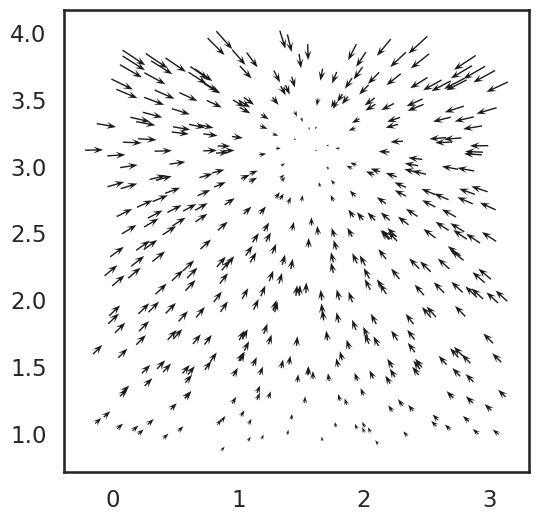

In [ ]:
freq=5 #play with density and...
std=.08 #...jitter 
headwidth = 5 #default is 3
headlength = 7 #default is 5

nX =  X + np.random.normal(scale=std,size=X.shape)
nY =  Y + np.random.normal(scale=std,size=X.shape)
nU = np.cos(nX)*nY
nV = np.sin(nY)*nY

plt.quiver(nX[::freq,::freq], nY[::freq,::freq], nU[::freq,::freq], nV[::freq,::freq],
          headwidth=headwidth, headlength=headlength)


Alternatively, we can use [streamplot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.streamplot.html?highlight=streamplot#matplotlib.pyplot.streamplot) function:

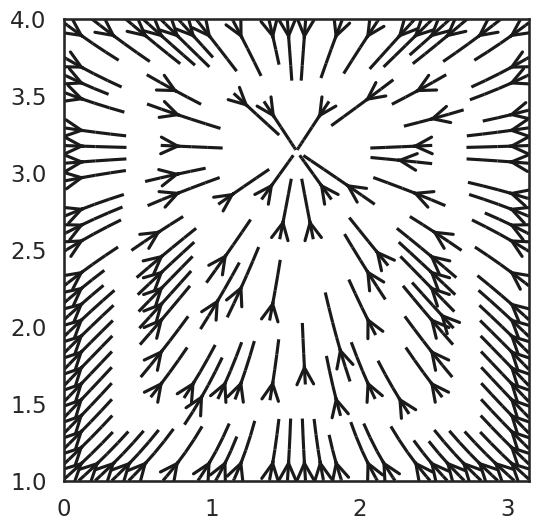

In [ ]:
density = (1, 1) #density  of streamlines
arrowsize = 3 #arrow size
plt.streamplot(X, Y, U, V, density=density, 
               arrowsize=arrowsize, arrowstyle='->', color='k', 
               maxlength=.2)

Now lets visually encode the speed values:

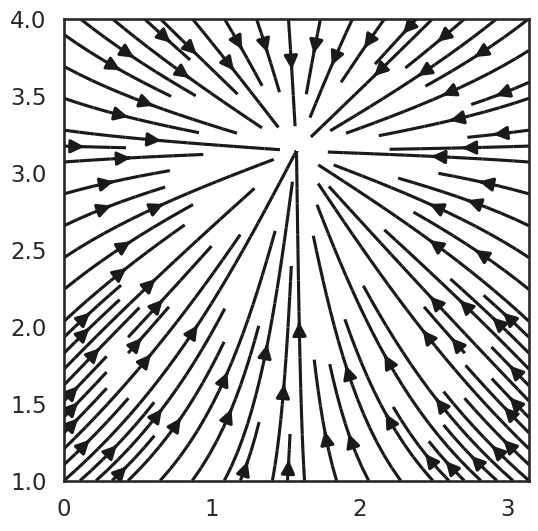

In [ ]:
speed = np.sqrt(U*U + V*V)

k = 1.2 #speed emphasis
density = (1, 1) #density  of streamlines
arrowsize = 2 #arrow size
plt.streamplot(X, Y, U, V, density=density,
               arrowsize=arrowsize, color='k')

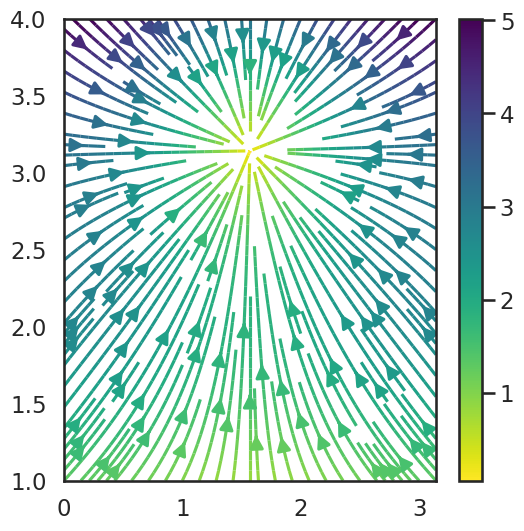

In [ ]:
speed = np.sqrt(U*U + V*V)

k = 1.5 #speed emphasis
density = (1.5, 1.5) #density  of streamlines
arrowsize = 2 #arrow size
plt.streamplot(X, Y, U, V, cmap='viridis_r', color=speed,
               arrowsize=arrowsize, density=density)
plt.colorbar()

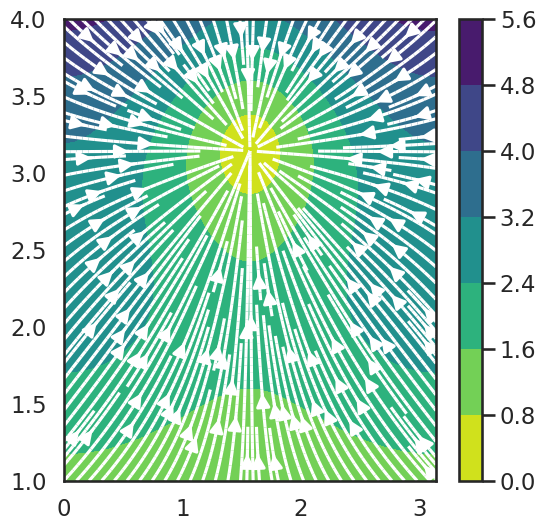

In [ ]:
speed = np.sqrt(U*U + V*V)

k = 1.5 #speed emphasis
density = (2, 2) #density  of streamlines
arrowsize = 2 #arrow size
plt.streamplot(X, Y, U, V, color='w',
               arrowsize=arrowsize, density=density)
plt.contourf(X,Y,speed,cmap='viridis_r')
plt.colorbar()